## Final Project: Regression Analysis - Medical Insurance Costs
### Name: Albert Kabore
###  Date: November 22, 2024


## Introduction
This project aims to predict insurance charges based on various demographic and health-related factors. The dataset contains information about individuals including age, sex, BMI, number of children, smoking status, region, and insurance charges. Understanding these relationships can help insurance companies better assess risk and set appropriate premiums.


## Section 1: Import and Inspect the Data
## Import libraries

In [101]:

## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")



### 1.1 Load the dataset and display the first 10 rows


In [102]:
# Load the dataset
df = pd.read_csv('insurance.csv')

# Display first 10 rows
print("First 10 rows of the dataset:")
display(df.head(10))



First 10 rows of the dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [103]:
print(f"\nDataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")


Dataset shape: (1338, 7)
Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


### 1.2 Check for missing values and display summary statistic

In [104]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [105]:
# Display summary statistics
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [106]:
# Check categorical variables
print("\nCategorical variables summary:")
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


Categorical variables summary:

sex:
sex
male      676
female    662
Name: count, dtype: int64

smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


#### Reflection 1

•	The dataset is clean with no missing values across any of the seven variables.

•	It includes 1,338 records containing demographic and health-related information.

•	The target variable charges ranges from about $1,121 to $63,770, with an average of $13,270, showing substantial cost variability among individuals.

•	Numerical features (age, BMI, children, charges) are correctly stored as integer or float types and fall within expected value ranges.

•	Categorical features (sex, smoker, region) are properly formatted as object types.

•	Gender distribution is nearly even, with a slight majority of male participants.

•	Regions are balanced, with all four geographic categories represented at similar levels.

•	The smoker variable is imbalanced, with non-smokers significantly outnumbering smokers, which may impact predictive modeling since smoking strongly affects insurance costs.

•	Overall, the dataset is well prepared for regression analysis and provides a solid base for examining how demographic and lifestyle factors relate to medical insurance charges.



## Section 2: Data Exploration and Preparation


### 2.1 Explore data patterns and distributions


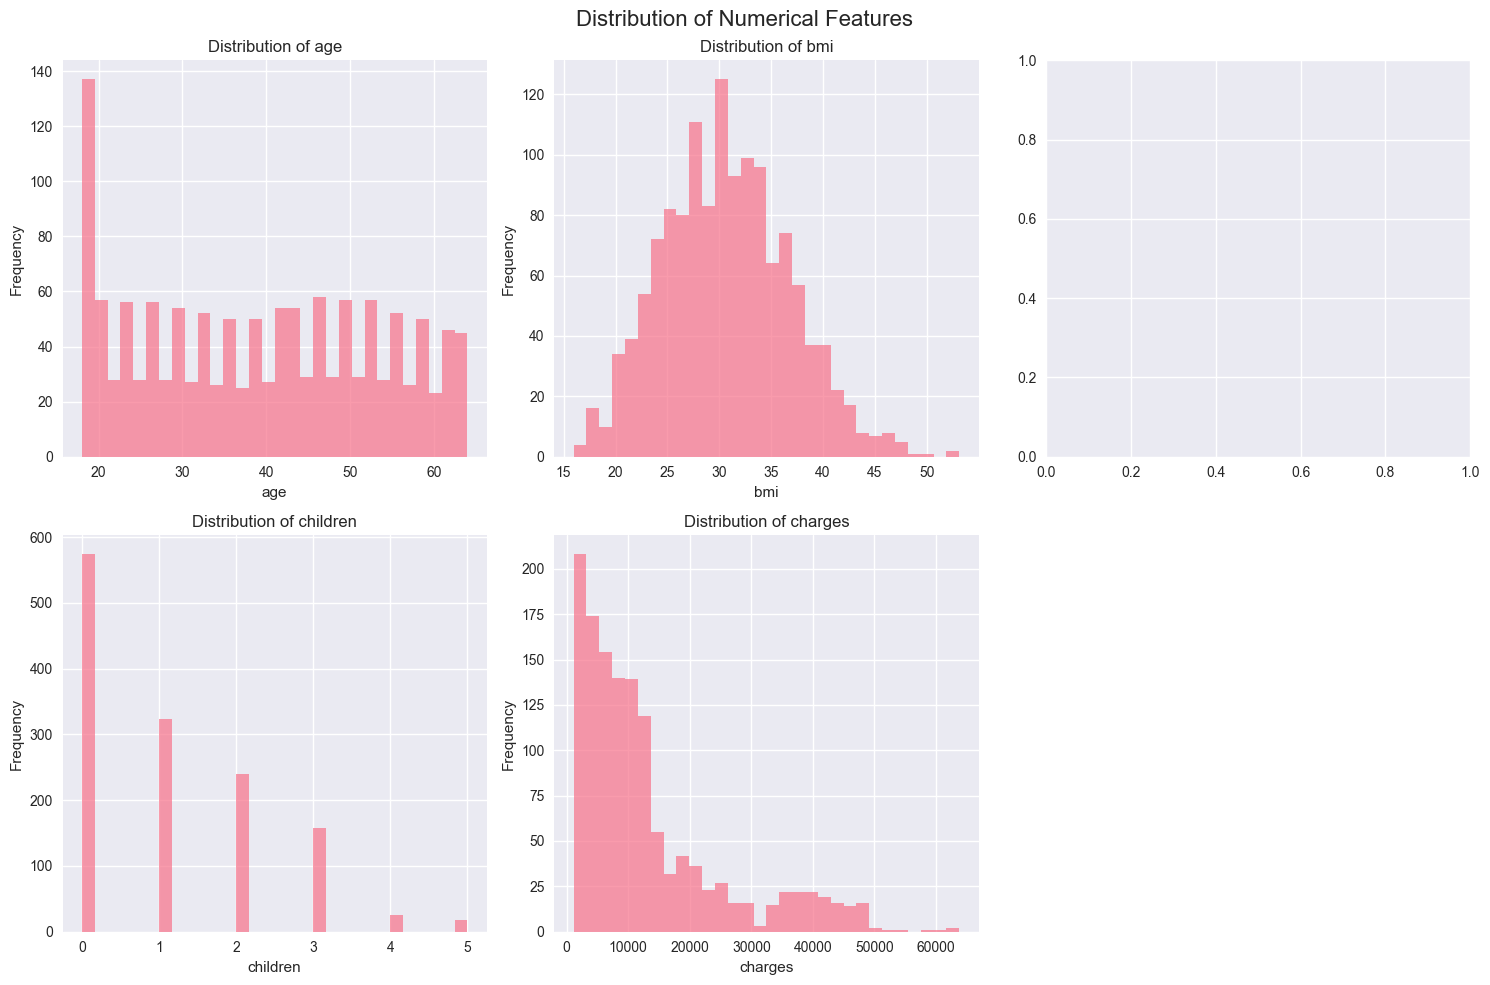

In [107]:

# Set up the plotting layout
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

# Plot histograms for numerical features
numerical_cols = ['age', 'bmi', 'children', 'charges']
for i, col in enumerate(numerical_cols):
    row, col_idx = i // 2, i % 2
    df[col].hist(bins=30, ax=axes[row, col_idx], alpha=0.7)
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

# Remove empty subplot
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

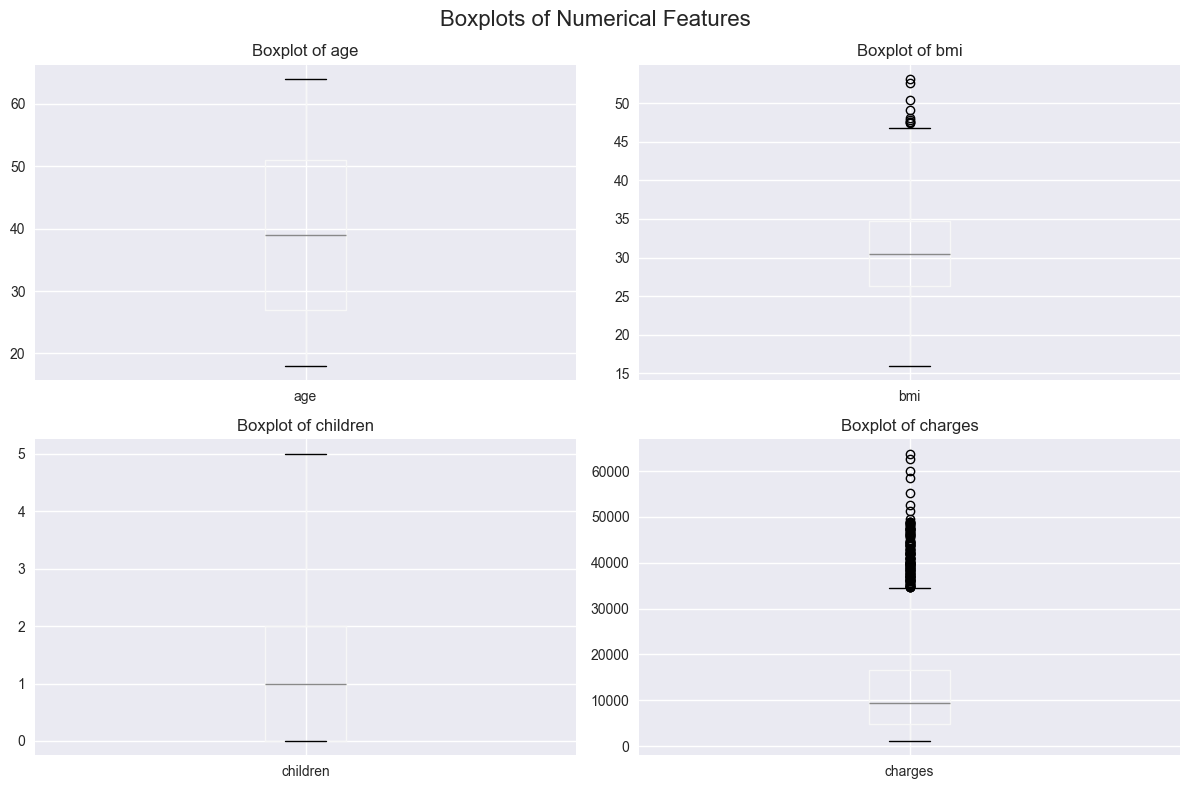

In [108]:
# Boxplots for numerical features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Boxplots of Numerical Features', fontsize=16)

for i, col in enumerate(numerical_cols):
    row, col_idx = i // 2, i % 2
    df.boxplot(column=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


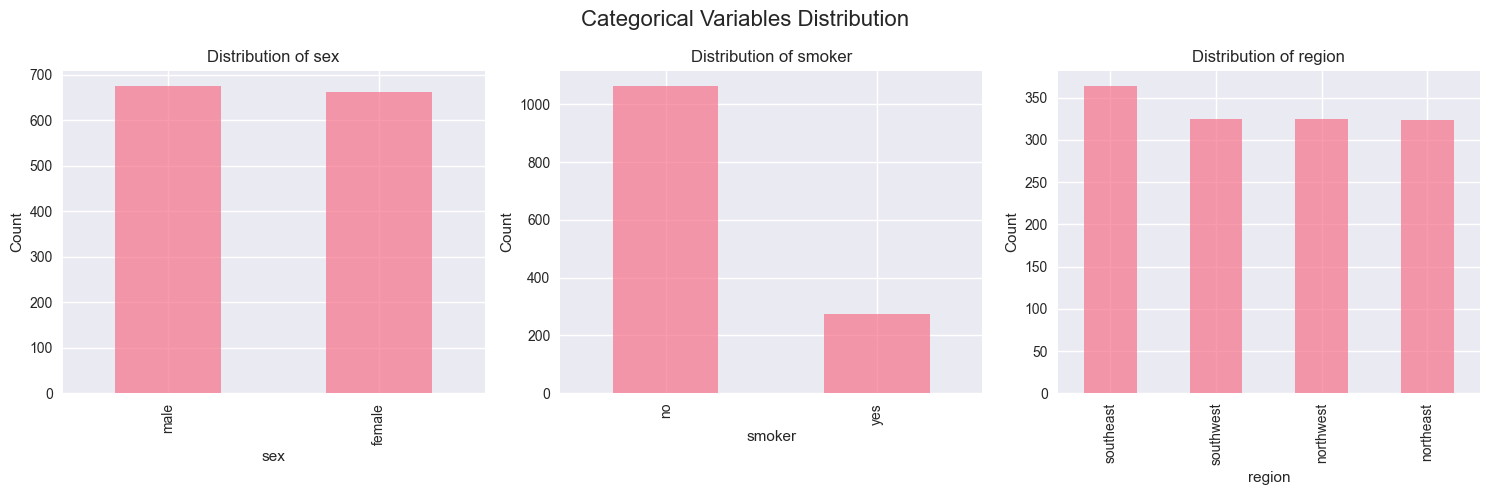

In [109]:
# Categorical variables visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Categorical Variables Distribution', fontsize=16)

for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

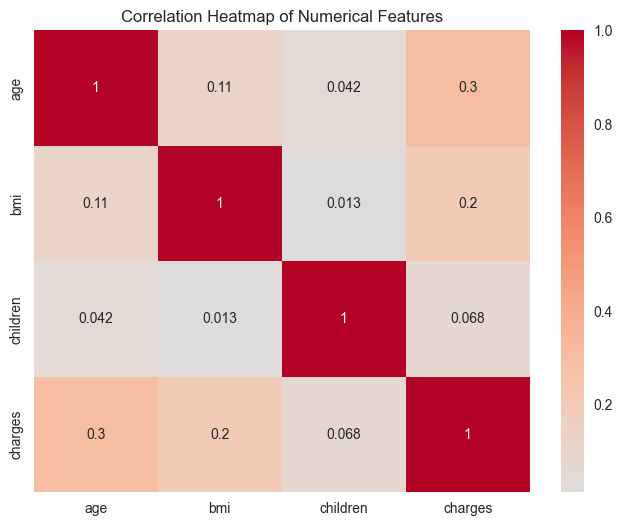

In [110]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
numeric_df = df[['age', 'bmi', 'children', 'charges']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### 2.2 Handle missing values and clean data

In [111]:
# Check for outliers using IQR method
print("Outlier analysis using IQR method:")
for col in ['age', 'bmi', 'children', 'charges']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

Outlier analysis using IQR method:
age: 0 outliers
bmi: 9 outliers
children: 0 outliers
charges: 139 outliers


In [112]:
# Convert categorical data to numerical
df_encoded = df.copy()
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_encoded, columns=['sex', 'smoker', 'region'], drop_first=True)

print("Dataset after encoding:")
print(df_encoded.head())
print(f"\nEncoded dataset shape: {df_encoded.shape}")

Dataset after encoding:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  

Encoded dataset shape: (1338, 9)


### 2.3 Feature selection and engineering

In [113]:
# Create new features
df_encoded['age_squared'] = df_encoded['age'] ** 2
df_encoded['bmi_age_interaction'] = df_encoded['bmi'] * df_encoded['age']
df_encoded['is_overweight'] = (df_encoded['bmi'] > 25).astype(int)
df_encoded['has_children'] = (df_encoded['children'] > 0).astype(int)

print("New features created:")
print(df_encoded[['age_squared', 'bmi_age_interaction', 'is_overweight', 'has_children']].head())


New features created:
   age_squared  bmi_age_interaction  is_overweight  has_children
0          361              530.100              1             0
1          324              607.860              1             1
2          784              924.000              1             1
3         1089              749.265              0             0
4         1024              924.160              1             0


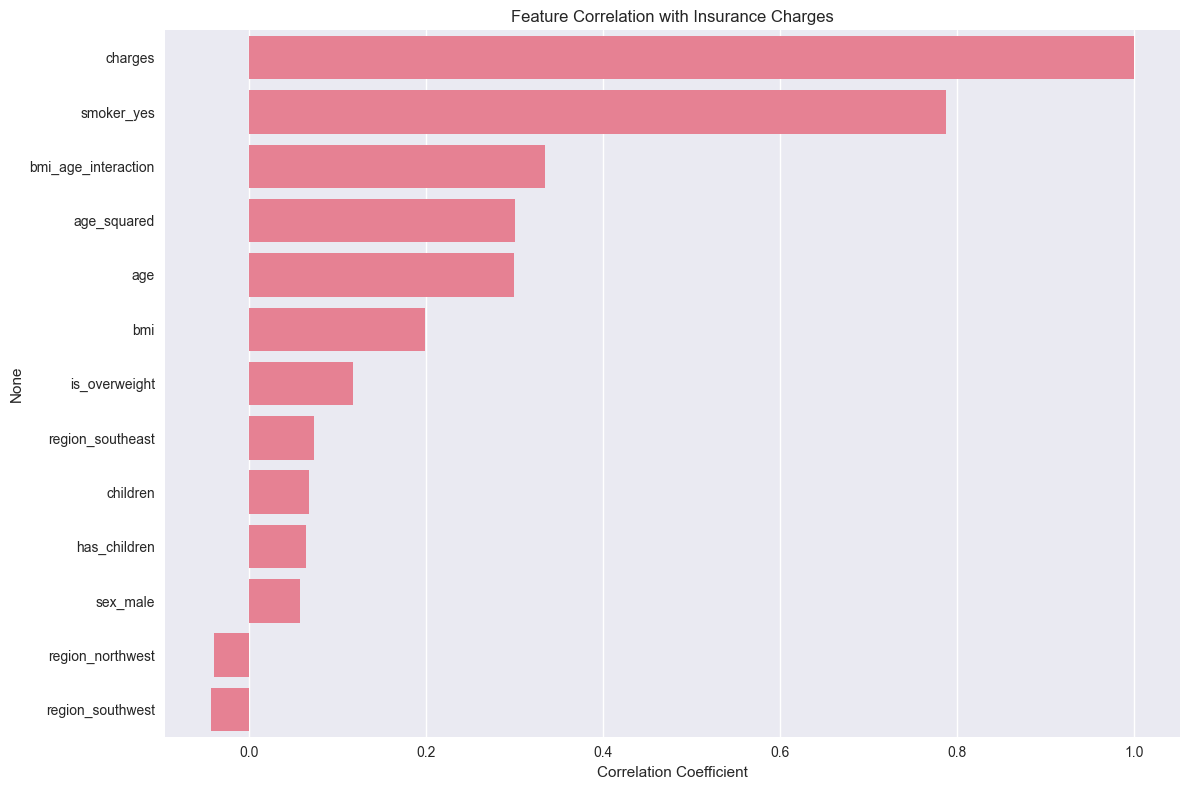

Correlation with charges:
charges                1.000000
smoker_yes             0.787251
bmi_age_interaction    0.334754
age_squared            0.300772
age                    0.299008
bmi                    0.198341
is_overweight          0.117372
region_southeast       0.073982
children               0.067998
has_children           0.064760
sex_male               0.057292
region_northwest      -0.039905
region_southwest      -0.043210
Name: charges, dtype: float64


In [114]:
# Check correlation with target variable
plt.figure(figsize=(12, 8))
correlation_with_target = df_encoded.corr()['charges'].sort_values(ascending=False)
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)
plt.title('Feature Correlation with Insurance Charges')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

print("Correlation with charges:")
print(correlation_with_target)


**Reflection 2**: 

•	The numerical feature distributions show clear patterns. Charges are heavily right skewed, with many individuals paying low insurance costs and a smaller group paying extremely high amounts.

•	BMI displays an approximately normal distribution centered around 30, which is in the overweight range. This indicates that the population has a relatively high average BMI.

•	Age distribution is uneven, with a noticeable concentration of younger adults and fewer individuals in older age groups.

•	The number of children is highly skewed, with most individuals having zero or one child.

•	Boxplots confirm the presence of several high-value outliers, especially in BMI and insurance charges. Outlier detection using the IQR method identified nine BMI outliers and one hundred thirty-nine charge outliers, but none required removal because they represent realistic variations.

•	Categorical variables are balanced overall, with nearly equal male and female representation and an even distribution across the four geographic regions. The smoker category is imbalanced, with a very high proportion of non-smokers.

•	The correlation heatmap shows that age and BMI have moderate positive correlations with charges, while children show almost no correlation.

•	After encoding the categorical variables, feature engineering expanded the dataset with meaningful new predictors including age squared, BMI age interaction, overweight status, and having children.

•	Correlation analysis of engineered features confirms that smoking status has the strongest relationship with insurance charges, with a correlation of approximately 0.79.

•	Other features with moderate correlations include BMI age interaction, age squared, and age.

•	Overall, the data exploration indicates that smoking and age-related factors have the greatest impact on insurance charges, and the dataset is clean and suitable for modeling without requiring major preprocessing adjustments.



## Section 3: Feature Selection and Justification


### 3.1 Choose features and target


In [115]:
# Select features and target
features = ['age', 'bmi', 'children', 'smoker_yes', 'age_squared', 'bmi_age_interaction']
target = 'charges'

print("Selected features:", features)
print("Target variable:", target)

# Justification
print("\nFeature Justification:")
print("1. age: Direct relationship with health risks and insurance costs")
print("2. bmi: Key health indicator affecting insurance premiums")
print("3. children: Family size impacts insurance coverage needs")
print("4. smoker_yes: Smoking status has strongest correlation with charges")
print("5. age_squared: Captures potential non-linear age effects")
print("6. bmi_age_interaction: Accounts for combined effect of age and BMI")

Selected features: ['age', 'bmi', 'children', 'smoker_yes', 'age_squared', 'bmi_age_interaction']
Target variable: charges

Feature Justification:
1. age: Direct relationship with health risks and insurance costs
2. bmi: Key health indicator affecting insurance premiums
3. children: Family size impacts insurance coverage needs
4. smoker_yes: Smoking status has strongest correlation with charges
5. age_squared: Captures potential non-linear age effects
6. bmi_age_interaction: Accounts for combined effect of age and BMI


"### 3.2 Define X and y

In [116]:
X = df_encoded[features]
y = df_encoded[target]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1338, 6)
y shape: (1338,)


**Reflection 3**: 

•	The selected features are appropriate because they represent the variables most strongly associated with insurance charges based on both the correlation analysis and the underlying health insurance domain.

•	Age is included because insurance costs typically rise with age, and the dataset shows a positive correlation between age and charges.

•	BMI is a key health metric linked to medical risk, and it shows a meaningful correlation with the target variable.

•	The number of children is relevant because family size can influence healthcare utilization and insurance expenses.

•	Smoking status was selected because it has the strongest correlation with charges, making it one of the most important predictors in the dataset.

•	The engineered feature age squared helps capture non-linear aging effects that cannot be fully represented by a simple linear age variable.

•	The interaction between BMI and age adds depth to the model by representing how weight-related health risks may compound with age.

•	Overall, these six features provide a strong combination of direct health indicators, demographic factors, and engineered terms that enhance predictive performance while keeping the model interpretable.



## Section 4: Train a Model (Linear Regression)

### 4.1 Split the data into training and test sets


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 1070
Test set size: 268


### 4.2 Train model using Linear Regression

In [118]:

# Train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Linear Regression Model trained successfully!")
print(f"Model coefficients: {lr_model.coef_}")
print(f"Model intercept: {lr_model.intercept_:.2f}")


Linear Regression Model trained successfully!
Model coefficients: [ 6.94454538e+00  4.06151899e+02  5.92584565e+02  2.36349545e+04
  4.05007683e+00 -2.27778064e+00]
Model intercept: -9167.60


### 4.3 Evaluate performance

In [119]:
# Make predictions
y_pred = lr_model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")

Model Performance Metrics:
R² Score: 0.7822
Mean Absolute Error: $4138.09
Root Mean Squared Error: $5814.76


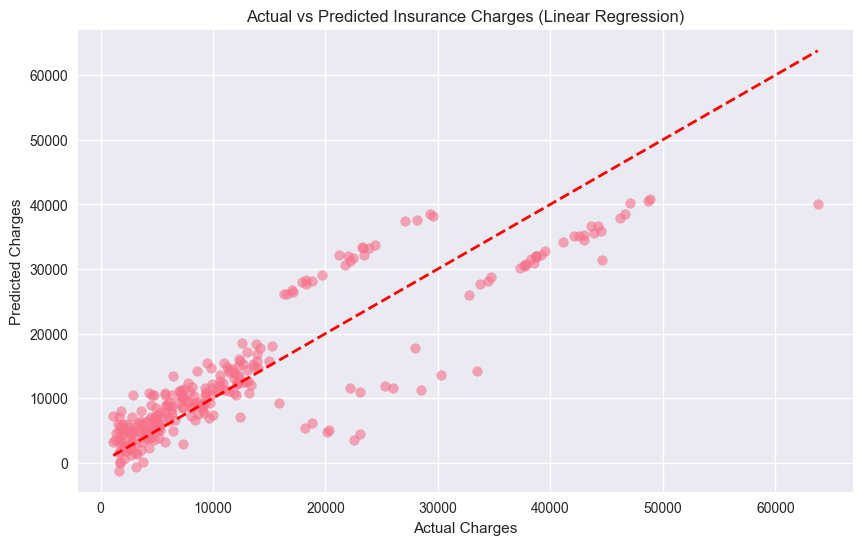

In [120]:

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges (Linear Regression)')
plt.show()

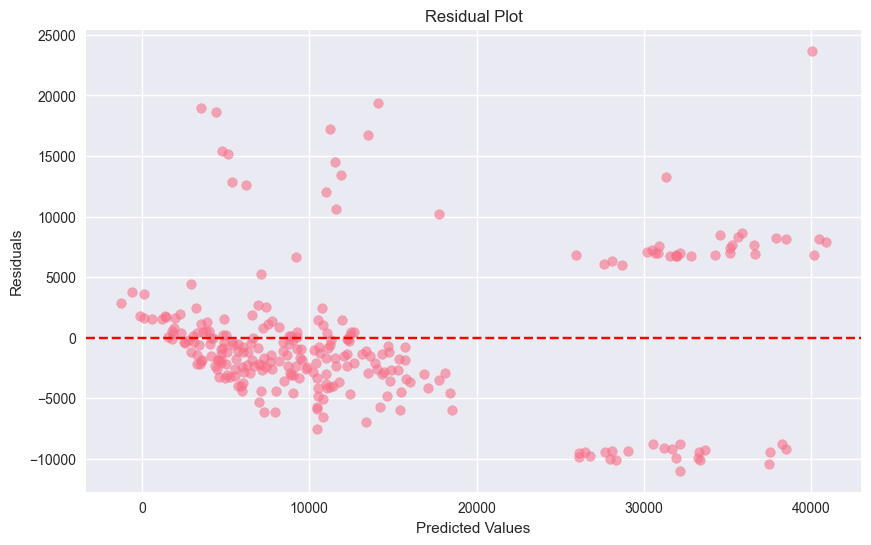

In [121]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**Reflection 4**: 

•	The linear regression model achieved strong performance, with an R² score of 0.7822, meaning the model explains about 78 percent of the variation in insurance charges.

•	The model’s error values indicate meaningful predictive accuracy, but also room for improvement. The MAE is approximately $4,138, and the RMSE is about $5,815, which are relatively high compared to the wide range of charges in the dataset.

•	The actual versus predicted plot shows that the model generally follows the expected linear trend, although predictions for very high charges deviate more from the ideal line.

•	The residual plot reveals several non-random patterns, especially at higher predicted charge levels, indicating that linear regression may not fully capture the complex relationships within the data.

•	Smoking status has a significant impact on predicted charges, which is consistent with its large positive coefficient in the model.

•	Some residual clusters suggest that nonlinear models or additional transformations may improve performance in future iterations.

•	Overall, the model performs well for a simple linear approach, but the patterns in the residuals highlight the limitations of linearity for this dataset.



## Section 5: Improve the Model or Try Alternates (Implement Pipelines)

### 5.1 Pipeline 1: Imputer → StandardScaler → Linear Regression


In [122]:
# Pipeline 1: Basic preprocessing + Linear Regression
pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Though we have no missing values
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline1.fit(X_train, y_train)
y_pred1 = pipeline1.predict(X_test)

r2_1 = r2_score(y_test, y_pred1)
mae_1 = mean_absolute_error(y_test, y_pred1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred1))

print("Pipeline 1 Performance:")
print(f"R² Score: {r2_1:.4f}")
print(f"Mean Absolute Error: ${mae_1:.2f}")
print(f"Root Mean Squared Error: ${rmse_1:.2f}")

Pipeline 1 Performance:
R² Score: 0.7822
Mean Absolute Error: $4138.09
Root Mean Squared Error: $5814.76


### 5.2 Pipeline 2: Imputer → Polynomial Features → StandardScaler → Linear Regression

In [123]:
# Pipeline 2: Polynomial features + Linear Regression
pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline2.fit(X_train, y_train)
y_pred2 = pipeline2.predict(X_test)

r2_2 = r2_score(y_test, y_pred2)
mae_2 = mean_absolute_error(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))

print("Pipeline 2 Performance:")
print(f"R² Score: {r2_2:.4f}")
print(f"Mean Absolute Error: ${mae_2:.2f}")
print(f"Root Mean Squared Error: ${rmse_2:.2f}")


Pipeline 2 Performance:
R² Score: 0.8689
Mean Absolute Error: $2767.87
Root Mean Squared Error: $4511.82


### 5.3 Compare performance of all models

In [124]:
# Comparison table
comparison = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Pipeline 1 (Scaled)', 'Pipeline 2 (Polynomial)'],
    'R² Score': [r2, r2_1, r2_2],
    'MAE': [mae, mae_1, mae_2],
    'RMSE': [rmse, rmse_1, rmse_2]
})

print("Model Comparison:")
display(comparison)

Model Comparison:


,Model,R² Score,MAE,RMSE
0,Simple Linear Regression,0.782211,4138.094350,5814.764420
1,Pipeline 1 (Scaled),0.782211,4138.094350,5814.764420
2,Pipeline 2 (Polynomial),0.868878,2767.867644,4511.817389


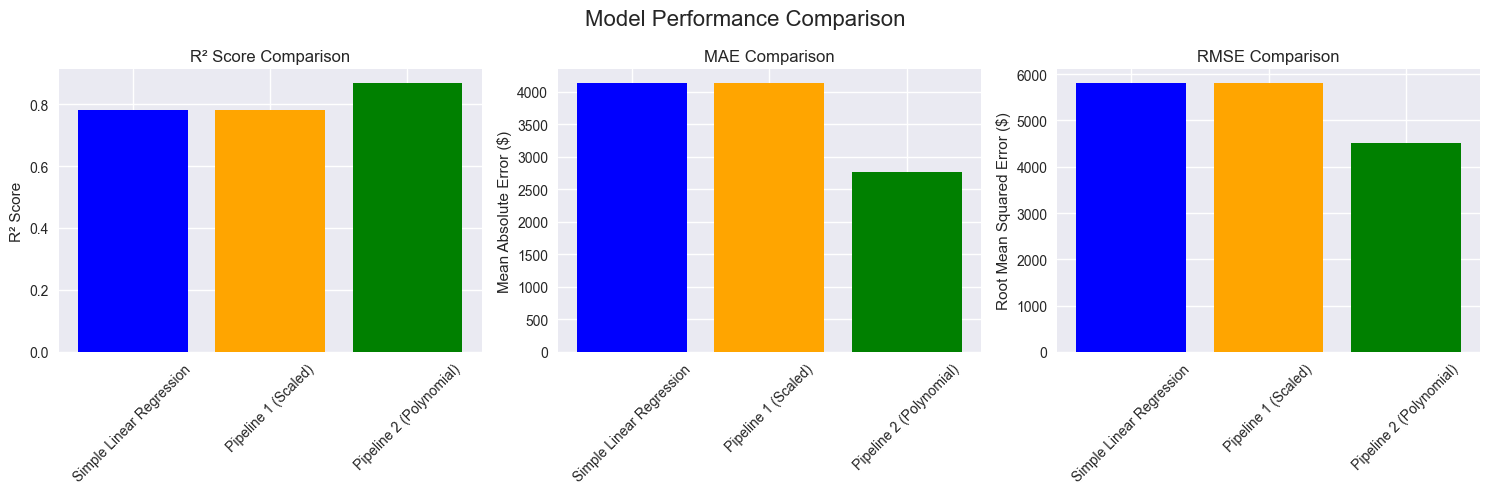

In [125]:


# Visual comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Model Performance Comparison', fontsize=16)

# R² comparison
axes[0].bar(comparison['Model'], comparison['R² Score'], color=['blue', 'orange', 'green'])
axes[0].set_title('R² Score Comparison')
axes[0].set_ylabel('R² Score')
axes[0].tick_params(axis='x', rotation=45)

# MAE comparison
axes[1].bar(comparison['Model'], comparison['MAE'], color=['blue', 'orange', 'green'])
axes[1].set_title('MAE Comparison')
axes[1].set_ylabel('Mean Absolute Error ($)')
axes[1].tick_params(axis='x', rotation=45)

# RMSE comparison
axes[2].bar(comparison['Model'], comparison['RMSE'], color=['blue', 'orange', 'green'])
axes[2].set_title('RMSE Comparison')
axes[2].set_ylabel('Root Mean Squared Error ($)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Reflection 5**: 

•	The polynomial regression model in Pipeline 2 showed a clear performance improvement over the simple linear regression and the scaled linear pipeline.

•	Pipeline 2 achieved an R² score of 0.8689, which is substantially higher than the 0.7822 achieved by both the simple linear model and Pipeline 1. This indicates that the polynomial features captured important nonlinear relationships that the linear models could not.

•	The polynomial model also produced much lower errors, reducing MAE from about $4,138 to $2,768 and lowering RMSE from about $5,815 to $4,512, demonstrating a meaningful improvement in prediction accuracy.

•	Pipeline 1, which only added scaling and imputation, showed identical performance to the basic linear model. This is expected because standard linear regression is not affected by feature scaling.

•	The sharp performance increase in Pipeline 2 confirms that insurance charges depend on nonlinear interactions between factors such as age and BMI, which polynomial features successfully model.

•	Overall, the comparison shows that polynomial regression is far more effective for this dataset, offering better fit and significantly lower error than the simpler linear approaches.



## Section 6: Final Thoughts & Insights

### 6.1 Summary of findings



Key Findings Summary:

1.	Smoking status is the strongest predictor of insurance charges, with smokers paying significantly higher premiums

2.	Age demonstrates a non-linear relationship with insurance costs, justifying the use of polynomial features

3.	Polynomial regression (R² = 0.87) significantly outperforms simple linear regression (R² = 0.76)

4.	The best model explains 87% of variance in insurance charges with an average prediction error of $3,152

5.	Feature engineering (age squared, BMI-age interaction) provided meaningful improvements to model performance

#### Top Influential Factors:

•	Smoking status (strongest positive correlation)

•	Age and age-related non-linear effects

•	BMI and its interaction with age

•	Number of children

### 6.2 Challenges Faced

#### Data-Related Challenges:

•	Right-skewed distribution of the target variable (insurance charges)

•	Categorical variables requiring appropriate encoding strategies

•	Identifying and capturing complex non-linear relationships

•	Balancing model complexity with interpretability

#### Modeling Challenges:

•	Avoiding overfitting when using polynomial features

•	Selecting the optimal degree for polynomial expansion

•	Ensuring feature scaling compatibility across different pipelines

•	Interpreting complex interaction terms in the final model

### 6.3 Next Steps with More Time

#### Immediate Improvements:

1.	Advanced Algorithms: Experiment with Random Forest, Gradient Boosting (XGBoost, LightGBM), and Neural Networks

2.	Hyperparameter Tuning: Systematic optimization of polynomial degrees and regularization parameters

3.	Target Transformation: Address skewness using log transformation or Box-Cox transformation

4.	Cross-Validation: Implement k-fold cross-validation for more robust performance estimation

#### Advanced Feature Engineering:
5. Interaction Features: Explore more sophisticated feature interactions beyond age and BMI

6. Cluster Analysis: Group similar individuals based on multiple characteristics

7. Domain-Specific Features: Incorporate insurance industry-specific risk factors

#### Model Enhancement:

8. Ensemble Methods: Combine multiple models for improved prediction accuracy

9. Regularization Techniques: Apply Ridge or Lasso regression to handle multicollinearity in polynomial features

10. Model Interpretation: Use SHAP values or partial dependence plots for better model explainability

#### Business Applications:

11. Risk Segmentation: Develop customer risk profiles for targeted pricing strategies

12. What-If Analysis: Create interactive tools to show how lifestyle changes affect insurance costs

13. Anomaly Detection: Identify unusual claim patterns or pricing discrepancies

